In [1]:
!unzip "/content/drive/MyDrive/Dataset /archive.zip" -d "/content/Dataset"

Streaming output truncated to the last 5000 lines.
  inflating: /content/Dataset/train/sad/Training_65242339.jpg  
  inflating: /content/Dataset/train/sad/Training_65267116.jpg  
  inflating: /content/Dataset/train/sad/Training_65275626.jpg  
  inflating: /content/Dataset/train/sad/Training_6529266.jpg  
  inflating: /content/Dataset/train/sad/Training_65329617.jpg  
  inflating: /content/Dataset/train/sad/Training_65338712.jpg  
  inflating: /content/Dataset/train/sad/Training_65338797.jpg  
  inflating: /content/Dataset/train/sad/Training_65387162.jpg  
  inflating: /content/Dataset/train/sad/Training_65404494.jpg  
  inflating: /content/Dataset/train/sad/Training_65426218.jpg  
  inflating: /content/Dataset/train/sad/Training_65430136.jpg  
  inflating: /content/Dataset/train/sad/Training_65437377.jpg  
  inflating: /content/Dataset/train/sad/Training_6545735.jpg  
  inflating: /content/Dataset/train/sad/Training_65463385.jpg  
  inflating: /content/Dataset/train/sad/Training_654739

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

picture_size = 48
folder_path = "/content/Dataset"


#Training :
batch_size=128
datagen_train=ImageDataGenerator()
datagen_val=ImageDataGenerator()
train_set = datagen_train.flow_from_directory(
    os.path.join(folder_path, "train"),
    target_size=(picture_size, picture_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True
)
test_set = datagen_val.flow_from_directory(
    os.path.join(folder_path, "test"),
    target_size=(picture_size, picture_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

no_of_classes=7

model=Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding="same",input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


#2nd CNN layer
model.add(Conv2D(128,(5,5),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes,activation="softmax"))

opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]
model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=48,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_6 (Bat  (None, 48, 48, 64)        256       
 chNormalization)                                                
                                                                 
 activation_6 (Activation)   (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 24, 24, 64)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 128)      

<ipython-input-3-61a64cb871a9>:112: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,


Epoch 1/48
224/224 [==============================] - ETA: 0s - loss: 1.7644 - accuracy: 0.3214

224/224 [==============================] - 25s 89ms/step - loss: 1.7644 - accuracy: 0.3214 - val_loss: 1.5812 - val_accuracy: 0.3989 - lr: 0.0010
Epoch 2/48
224/224 [==============================] - ETA: 0s - loss: 1.4326 - accuracy: 0.4521

224/224 [==============================] - 17s 77ms/step - loss: 1.4326 - accuracy: 0.4521 - val_loss: 1.6360 - val_accuracy: 0.4171 - lr: 0.0010
Epoch 3/48
224/224 [==============================] - ETA: 0s - loss: 1.2745 - accuracy: 0.5134

224/224 [==============================] - 17s 75ms/step - loss: 1.2745 - accuracy: 0.5134 - val_loss: 1.5623 - val_accuracy: 0.4008 - lr: 0.0010
Epoch 4/48
224/224 [==============================] - ETA: 0s - loss: 1.1923 - accuracy: 0.5483

224/224 [==============================] - 16s 72ms/step - loss: 1.1923 - accuracy: 0.5483 - val_loss: 1.2631 - val_accuracy: 0.5266 - lr: 0.0010
Epoch 5/48
224/224 [==============================] - ETA: 0s - loss: 1.1292 - accuracy: 0.5727

224/224 [==============================] - 16s 72ms/step - loss: 1.1292 - accuracy: 0.5727 - val_loss: 1.2408 - val_accuracy: 0.5300 - lr: 0.0010
Epoch 6/48
224/224 [==============================] - ETA: 0s - loss: 1.0700 - accuracy: 0.5980

224/224 [==============================] - 17s 76ms/step - loss: 1.0700 - accuracy: 0.5980 - val_loss: 1.1506 - val_accuracy: 0.5657 - lr: 0.0010
Epoch 7/48
224/224 [==============================] - ETA: 0s - loss: 1.0241 - accuracy: 0.6137

224/224 [==============================] - 17s 74ms/step - loss: 1.0241 - accuracy: 0.6137 - val_loss: 1.1444 - val_accuracy: 0.5671 - lr: 0.0010
Epoch 8/48
224/224 [==============================] - ETA: 0s - loss: 0.9857 - accuracy: 0.6294

224/224 [==============================] - 16s 73ms/step - loss: 0.9857 - accuracy: 0.6294 - val_loss: 1.1451 - val_accuracy: 0.5706 - lr: 0.0010
Epoch 9/48
224/224 [==============================] - ETA: 0s - loss: 0.9457 - accuracy: 0.6463

224/224 [==============================] - 16s 73ms/step - loss: 0.9457 - accuracy: 0.6463 - val_loss: 1.1024 - val_accuracy: 0.5922 - lr: 0.0010
Epoch 10/48
224/224 [==============================] - ETA: 0s - loss: 0.8959 - accuracy: 0.6663

224/224 [==============================] - 17s 77ms/step - loss: 0.8959 - accuracy: 0.6663 - val_loss: 1.1404 - val_accuracy: 0.5841 - lr: 0.0010
Epoch 11/48
224/224 [==============================] - ETA: 0s - loss: 0.8619 - accuracy: 0.6767

224/224 [==============================] - 16s 73ms/step - loss: 0.8619 - accuracy: 0.6767 - val_loss: 1.1433 - val_accuracy: 0.5866 - lr: 0.0010
Epoch 12/48
224/224 [==============================] - ETA: 0s - loss: 0.8166 - accuracy: 0.6952Restoring model weights from the end of the best epoch: 9.



Epoch 12: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
224/224 [==============================] - 16s 72ms/step - loss: 0.8166 - accuracy: 0.6952 - val_loss: 1.1202 - val_accuracy: 0.5977 - lr: 0.0010
Epoch 12: early stopping


In [4]:
model.save_weights('face_emotion_model.h5')

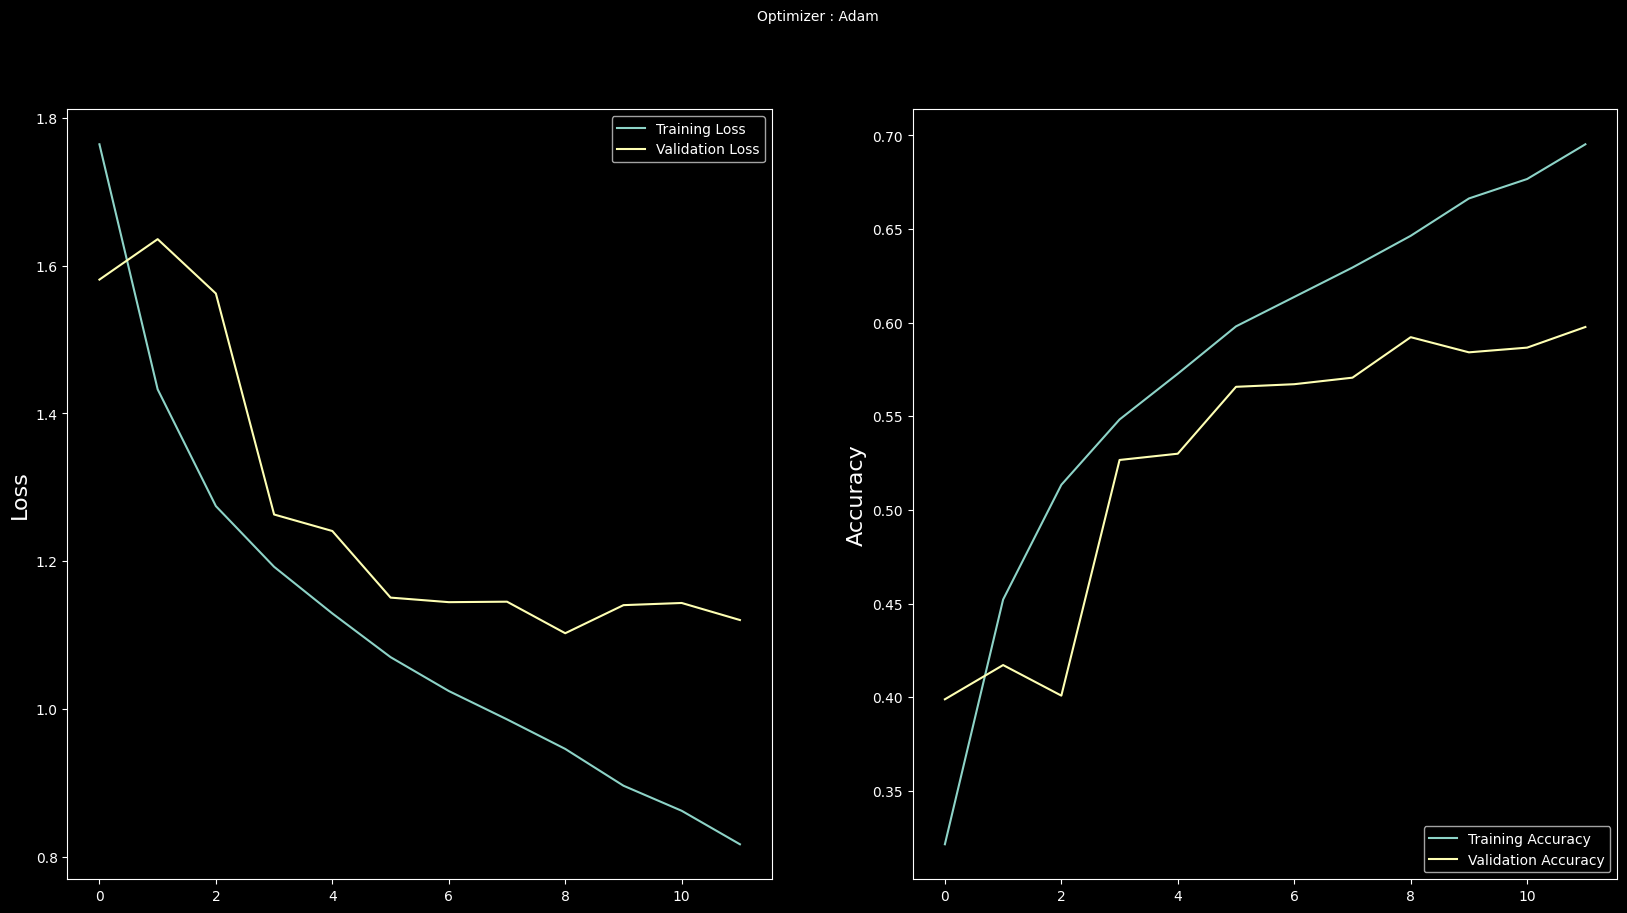

In [5]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()